# Covid-19 Analysis

<h4>Setup and read dataset file. Souce in Kaggle, "imdevskp/corona-virus-report"
<h5>    
    Plotly is required. You'll need a username and corresponding api_key to connect to it and generate the plots online.

In [833]:
import chart_studio, zipfile, math
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import pylab as pl
from scipy.optimize import curve_fit

In [834]:
initable = pd.read_table('covid-19.ini', delimiter=',', dtype={'Key':str, 'Value':str})
chart_studio.tools.set_credentials_file(username=initable.iloc[0,1], api_key=initable.iloc[1,1])
z = zipfile.ZipFile(initable.iloc[2,1])
dataset = pd.read_csv(z.open(initable.iloc[3,1]))
# drop non-interesting categories
del dataset["Lat"]
del dataset["Long"]
dataset.rename({"Province/State": "Province"}, axis=1, inplace=True)
dataset.rename({"Country/Region": "Country"}, axis=1, inplace=True)
series = []

In [835]:
interestingCountries=["France","Brazil", "US", "Italy", "Spain", "Germany", "New Zealand", "China", "Canada"]
highlightedCountries=['Brazil','Canada', 'New Zealand', 'Spain', 'China', "US"]
model_country = 'Brazil'
country_to_predict = 'Brazil'

In [836]:
# drop non-interesting Countries
dataset=dataset[dataset.Country.isin(interestingCountries)]
dataset

,Province,Country,Date,Confirmed,Deaths,Recovered
28,NaN,Brazil,1/22/20,0,0.0,0
35,Alberta,Canada,1/22/20,0,0.0,0
36,British Columbia,Canada,1/22/20,0,0.0,0
37,Grand Princess,Canada,1/22/20,0,0.0,0
38,Manitoba,Canada,1/22/20,0,0.0,0
...,...,...,...,...,...,...
20583,NaN,US,4/9/20,461437,16478.0,25410
20589,Diamond Princess,Canada,4/9/20,0,1.0,0
20602,Northwest Territories,Canada,4/9/20,5,0.0,0
20603,Yukon,Canada,4/9/20,7,0.0,0


<h5>Find 'Confirmed' cases

In [837]:
confirmedresultset=dataset.groupby(['Country','Date']).agg({'Confirmed': sum})
confirmedresultset.reset_index(level=['Date'], inplace=True) #put Date back to column
confirmedresultset['Date']=pd.to_datetime(confirmedresultset['Date'], format='%m/%d/%y') #convert column to type Date
confirmedresultset=confirmedresultset.sort_values(['Country','Date'], ascending=True) #sort by Country then Date
confirmedresultset['DailyChange']=confirmedresultset['Confirmed'].diff()
confirmedresultset['Days']=0
confirmedresultset.loc[confirmedresultset['DailyChange']<0,"DailyChange"]=np.nan
for country in interestingCountries:
    length=len(confirmedresultset.loc[country,'Days'])
    dayOne=next((i for i, x in enumerate(confirmedresultset[confirmedresultset.index == country].Confirmed) if x), length)
    confirmedresultset.loc[country,"Days"][dayOne:length]=range(1,length-dayOne+1) # 1st day with a Confirmed case
confirmedresultset


c:\users\lozas\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:1042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\lozas\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Confirmed,DailyChange,Days
Country,,,,
Brazil,2020-01-22,0,NaN,0
Brazil,2020-01-23,0,0.0,0
Brazil,2020-01-24,0,0.0,0
Brazil,2020-01-25,0,0.0,0
Brazil,2020-01-26,0,0.0,0
...,...,...,...,...
US,2020-04-05,337072,28219.0,75
US,2020-04-06,366667,29595.0,76
US,2020-04-07,396223,29556.0,77


<h5>Find 'Deaths' cases

In [838]:
deathsresultset=dataset.groupby(['Country','Date']).agg({'Deaths': sum})
deathsresultset.reset_index(level=['Date'], inplace=True) #put Date back to column
deathsresultset['Date']=pd.to_datetime(deathsresultset['Date'], format='%m/%d/%y') #convert column to type Date
deathsresultset=deathsresultset.sort_values(['Country','Date'], ascending=True) #sort by Country then Date
deathsresultset['DailyChange']=deathsresultset['Deaths'].diff()
deathsresultset['Days']=0
deathsresultset.loc[deathsresultset['DailyChange']<0,"DailyChange"]=np.nan
for country in interestingCountries:
    length=len(deathsresultset.loc[country,'Days'])
    dayOne=next((i for i, x in enumerate(deathsresultset[deathsresultset.index == country].Deaths) if x), length)
    deathsresultset.loc[country,"Days"][dayOne:length]=range(1,length-dayOne+1) # 1st day with a Death case
deathsresultset

c:\users\lozas\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:1042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\lozas\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Deaths,DailyChange,Days
Country,,,,
Brazil,2020-01-22,0.0,NaN,0
Brazil,2020-01-23,0.0,0.0,0
Brazil,2020-01-24,0.0,0.0,0
Brazil,2020-01-25,0.0,0.0,0
Brazil,2020-01-26,0.0,0.0,0
...,...,...,...,...
US,2020-04-05,9619.0,1212.0,37
US,2020-04-06,10783.0,1164.0,38
US,2020-04-07,12722.0,1939.0,39


<h5>Find 'Recovered' cases

In [839]:
recoveredresultset=dataset.groupby(['Country','Date']).agg({'Recovered': sum})
recoveredresultset.reset_index(level=['Date'], inplace=True) #put Date back to column
recoveredresultset['Date']=pd.to_datetime(recoveredresultset['Date'], format='%m/%d/%y') #convert column to type Date
recoveredresultset=recoveredresultset.sort_values(['Country','Date'], ascending=True) #sort by Country then Date
recoveredresultset['DailyChange']=recoveredresultset['Recovered'].diff()
recoveredresultset['Days']=0
recoveredresultset.loc[recoveredresultset['DailyChange']<0,"DailyChange"]=np.nan
for country in interestingCountries:
    length=len(recoveredresultset.loc[country,'Days'])
    dayOne=next((i for i, x in enumerate(recoveredresultset[recoveredresultset.index == country].Recovered) if x), length)
    recoveredresultset.loc[country,'Days'][dayOne:length]=range(1,length-dayOne+1) # 1st day with a recovered case
recoveredresultset

c:\users\lozas\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:1042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\lozas\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Recovered,DailyChange,Days
Country,,,,
Brazil,2020-01-22,0,NaN,0
Brazil,2020-01-23,0,0.0,0
Brazil,2020-01-24,0,0.0,0
Brazil,2020-01-25,0,0.0,0
Brazil,2020-01-26,0,0.0,0
...,...,...,...,...
US,2020-04-05,17448,2796.0,57
US,2020-04-06,19581,2133.0,58
US,2020-04-07,21763,2182.0,59


<h4>Confirmed cases graphic

In [840]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=confirmedresultset[confirmedresultset.index == country].Date, 
            y=confirmedresultset[confirmedresultset.index == country].Confirmed, 
            name=country+" Confirmed", 
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

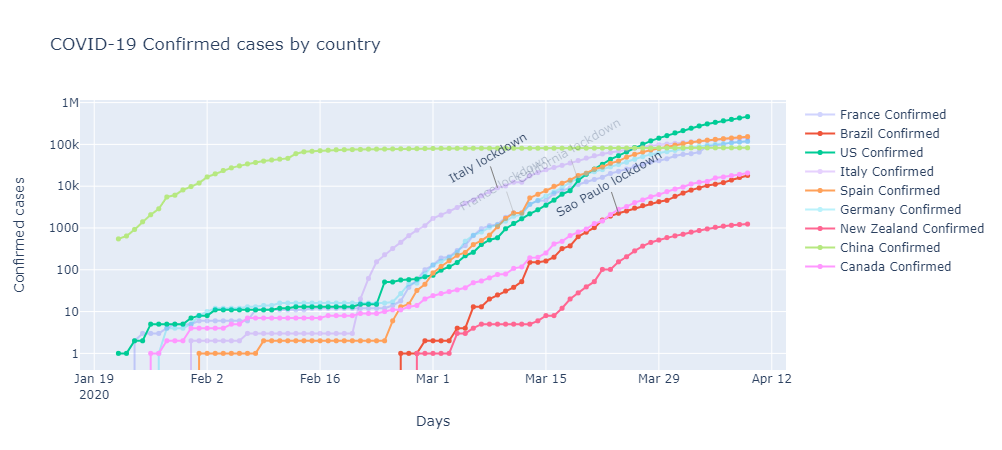

In [841]:
figcc = go.Figure(series)
figcc.update_layout(title_text='COVID-19 Confirmed cases by country')
figcc.update_xaxes(title_text='Days')
figcc.update_yaxes(title_text='Confirmed cases', type='log')
figcc.add_annotation(
        x='2020-03-24',
        y=math.log(2247,10), xref="x", yref="y",
        text="Sao Paulo lockdown", textangle = 330, showarrow=True, arrowcolor='grey')
figcc.add_annotation(
        x='2020-03-09',
        y=math.log(9172,10), xref="x", yref="y",
        text="Italy lockdown", textangle = 330, showarrow=True, arrowcolor='grey')
figcc.add_annotation(
        x='2020-03-11',
        y=math.log(2293,10), xref="x", yref="y",
        text="France lockdown", textangle = 330, showarrow=True, arrowcolor='grey', opacity=0.3)
figcc.add_annotation(
        x='2020-03-19',
        y=math.log(13677,10), xref="x", yref="y",
        text="California lockdown", textangle = 330, showarrow=True, arrowcolor='grey', opacity=0.3)
#py.iplot(figcc, file='covid-19.html', auto_open=False)
figcc.show()

<h4>Confirmed cases evolution

In [842]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=confirmedresultset[confirmedresultset.index == country].Days, 
            y=confirmedresultset[confirmedresultset.index == country].Confirmed, 
            name=country+" Confirmed", 
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

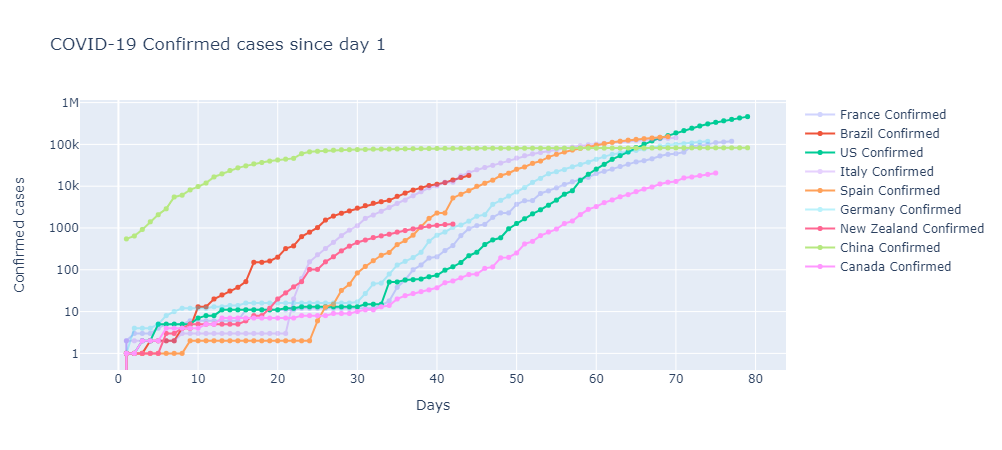

In [843]:
figcc = go.Figure(series)
figcc.update_layout(title_text='COVID-19 Confirmed cases since day 1')
figcc.update_xaxes(title_text='Days')
figcc.update_yaxes(title_text='Confirmed cases', type='log')
figcc.show()

<h4>New Confirmed cases

In [844]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=confirmedresultset[confirmedresultset.index == country].Date, 
            y=confirmedresultset[confirmedresultset.index == country].DailyChange, 
            name=country+" new confirmed", 
            mode="markers", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

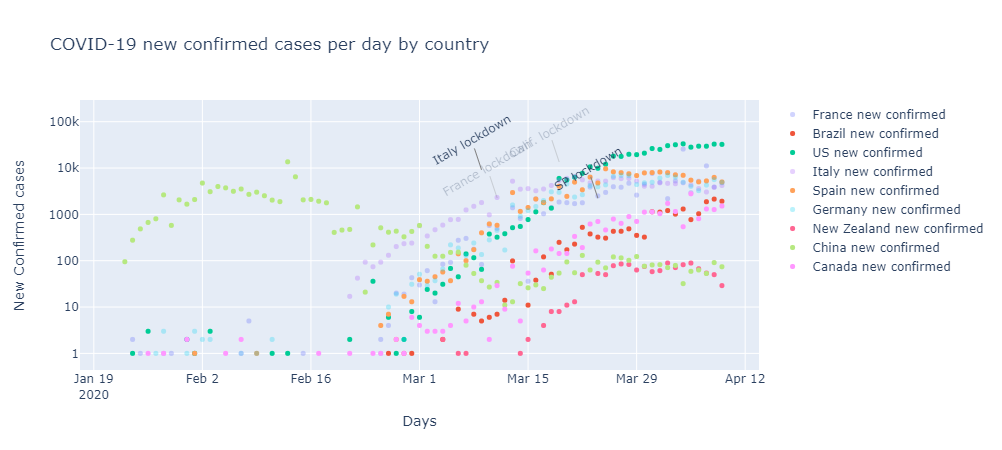

In [845]:
fignc = go.Figure(series)
fignc.update_layout(title_text='COVID-19 new confirmed cases per day by country')
fignc.update_xaxes(title_text='Days')
fignc.update_yaxes(title_text='New Confirmed cases', type='log')
fignc.add_annotation(
        x='2020-03-24',
        y=math.log(2247,10), xref="x", yref="y",
        text="SP lockdown", textangle = 330, showarrow=True, arrowcolor='grey')
fignc.add_annotation(
        x='2020-03-09',
        y=math.log(9172,10), xref="x", yref="y",
        text="Italy lockdown", textangle = 330, showarrow=True, arrowcolor='grey')
fignc.add_annotation(
        x='2020-03-11',
        y=math.log(2293,10), xref="x", yref="y",
        text="France lockdown", textangle = 330, showarrow=True, arrowcolor='grey', opacity=0.3)
fignc.add_annotation(
        x='2020-03-19',
        y=math.log(13677,10), xref="x", yref="y",
        text="Calif. lockdown", textangle = 330, showarrow=True, arrowcolor='grey', opacity=0.3)
#py.iplot(fignc, file='covid-19.html', auto_open=False)
fignc.show()

<h4>New Confirmed cases per day

In [846]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=confirmedresultset[confirmedresultset.index == country].Days, 
            y=confirmedresultset[confirmedresultset.index == country].DailyChange, 
            name=country+" new confirmed", 
            mode="markers", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

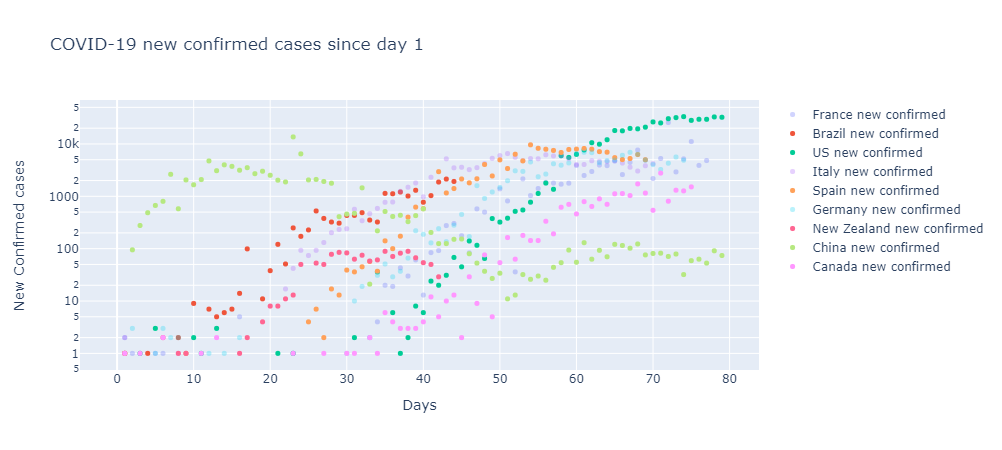

In [847]:
fignc = go.Figure(series)
fignc.update_layout(title_text='COVID-19 new confirmed cases since day 1')
fignc.update_xaxes(title_text='Days')
fignc.update_yaxes(title_text='New Confirmed cases', type='log')
fignc.show()

In [848]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=deathsresultset[deathsresultset.index == country].Date, 
            y=deathsresultset[deathsresultset.index == country].Deaths, 
            name=country+" Deaths",
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
        )
    )

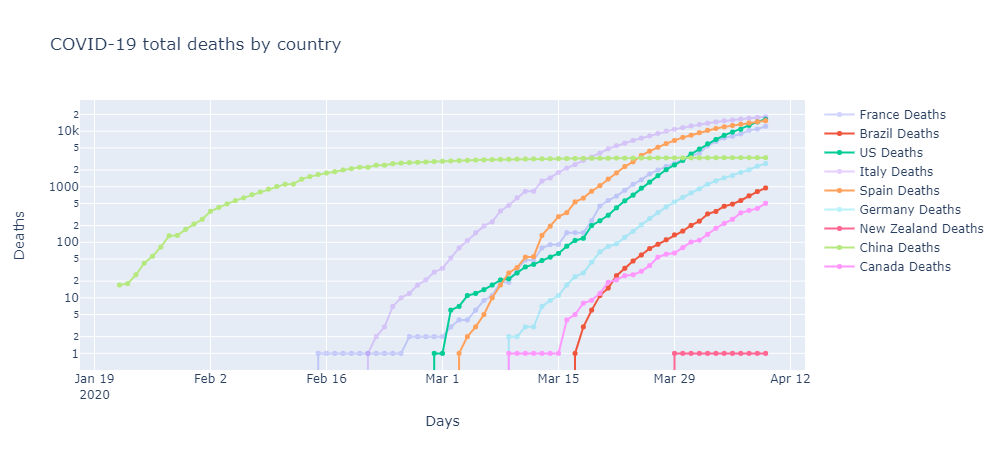

In [849]:
figdc = go.Figure(series)
figdc.update_layout(title_text='COVID-19 total deaths by country')
figdc.update_xaxes(title_text='Days')
figdc.update_yaxes(title_text='Deaths', type='log')
#py.iplot(figdc, file='covid-19.html', auto_open=False)
figdc.show()

<h5> New Deaths per day

In [850]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=deathsresultset[deathsresultset.index == country].Date, 
            y=deathsresultset[deathsresultset.index == country].DailyChange, 
            name=country+" new deaths", 
            mode="markers", opacity=focus,
            marker={"symbol":"circle", "size": 5}, 
            )
        )

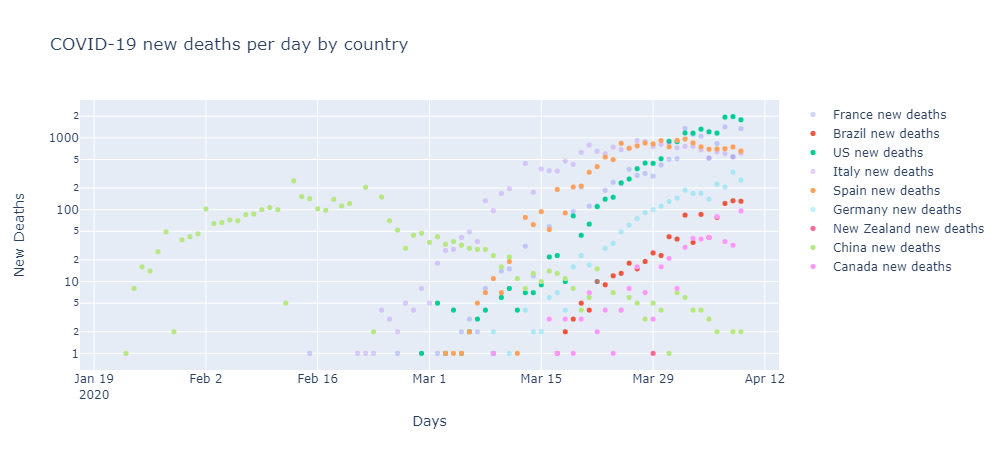

In [851]:
fignd = go.Figure(series)
fignd.update_layout(title_text='COVID-19 new deaths per day by country')
fignd.update_xaxes(title_text='Days')
fignd.update_yaxes(title_text='New Deaths', type='log')
#py.iplot(fignd, file='covid-19.html', auto_open=False)
fignd.show()

<h4>Recovered cases

In [852]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=recoveredresultset[recoveredresultset.index == country].Date, 
            y=recoveredresultset[recoveredresultset.index == country].Recovered, 
            name=country+" Recovered",
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
        )
    )

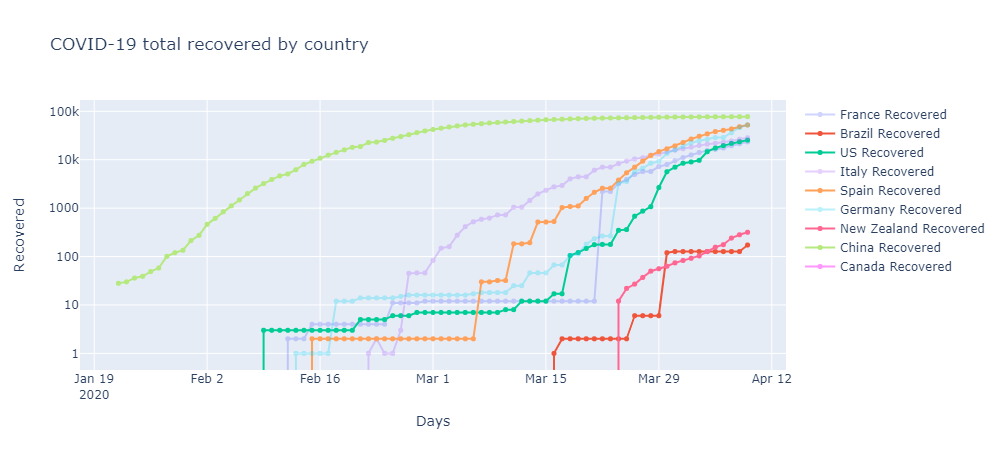

In [853]:
fig = go.Figure(series)
fig.update_layout(title_text='COVID-19 total recovered by country')
fig.update_xaxes(title_text='Days')
fig.update_yaxes(title_text='Recovered', type='log')
#py.iplot(fig, file='covid-19.html', auto_open=False)
fig.show()

<h5>New Recovered cases per day

In [854]:
series = []
for country in interestingCountries: 
    if country in highlightedCountries:
        focus = 1
    else:
        focus = 0.3
    series.append(
        go.Scatter(
            x=recoveredresultset[recoveredresultset.index == country].Date, 
            y=recoveredresultset[recoveredresultset.index == country].DailyChange, 
            name=country+" new recovered", 
            mode="markers", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            )
        )

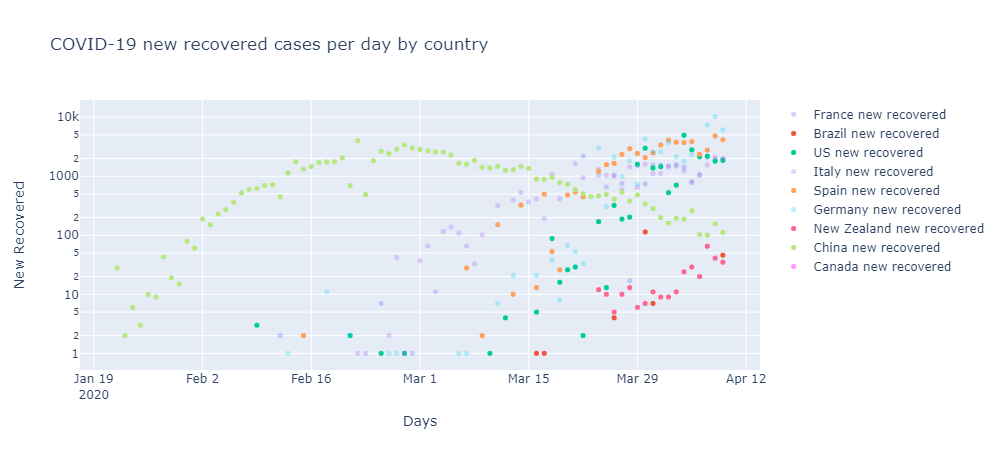

In [855]:
fig = go.Figure(series)
fig.update_layout(title_text='COVID-19 new recovered cases per day by country')
fig.update_xaxes(title_text='Days')
fig.update_yaxes(title_text='New Recovered', type='log')
#py.iplot(fig, file='covid-19.html', auto_open=False)
fig.show()

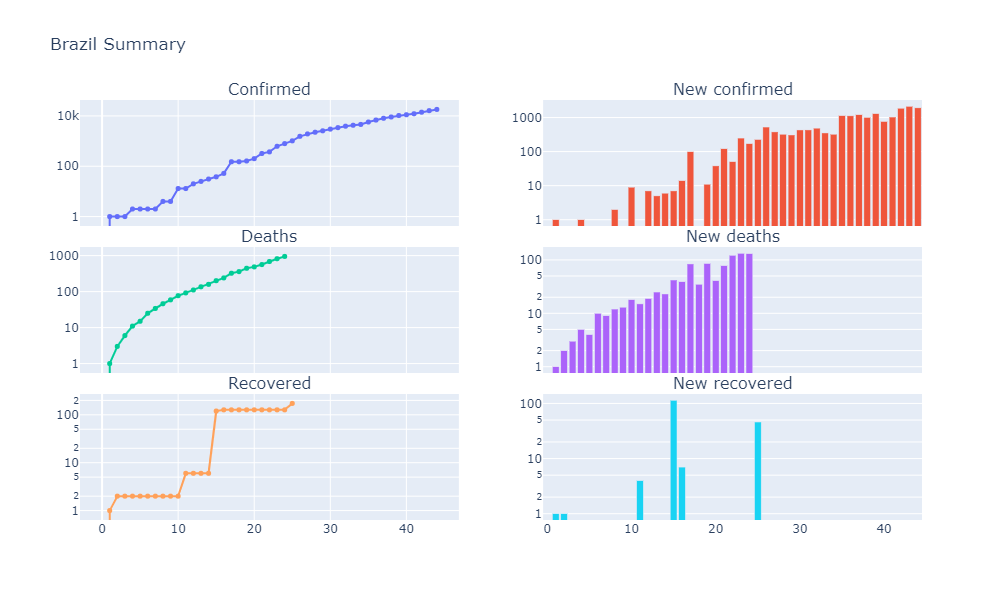

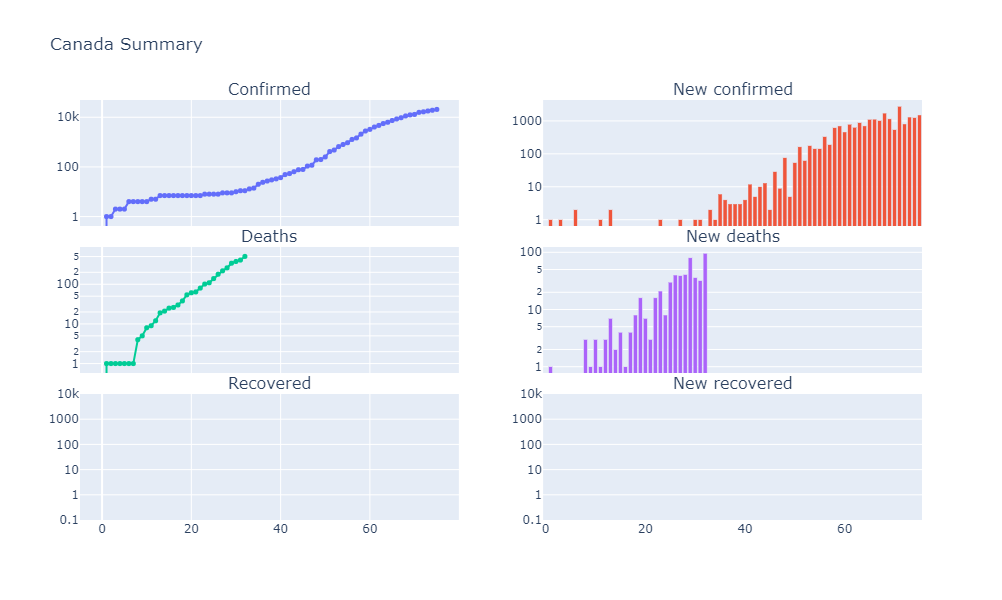

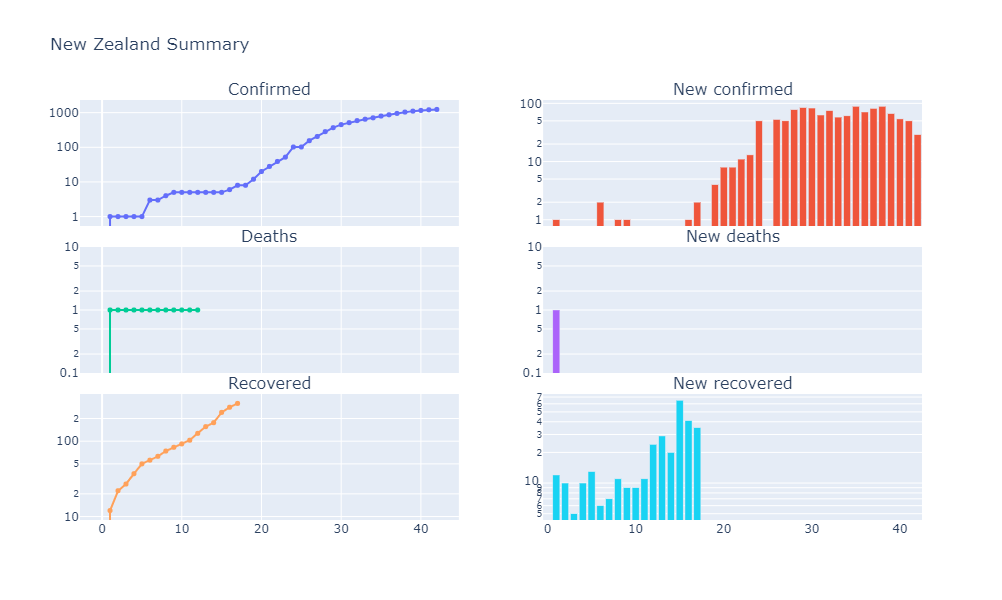

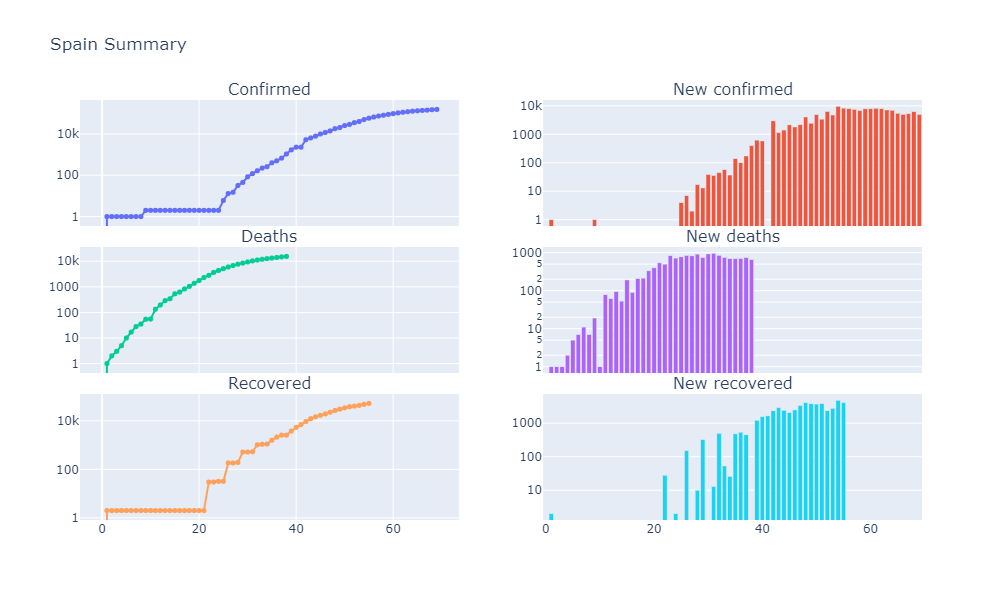

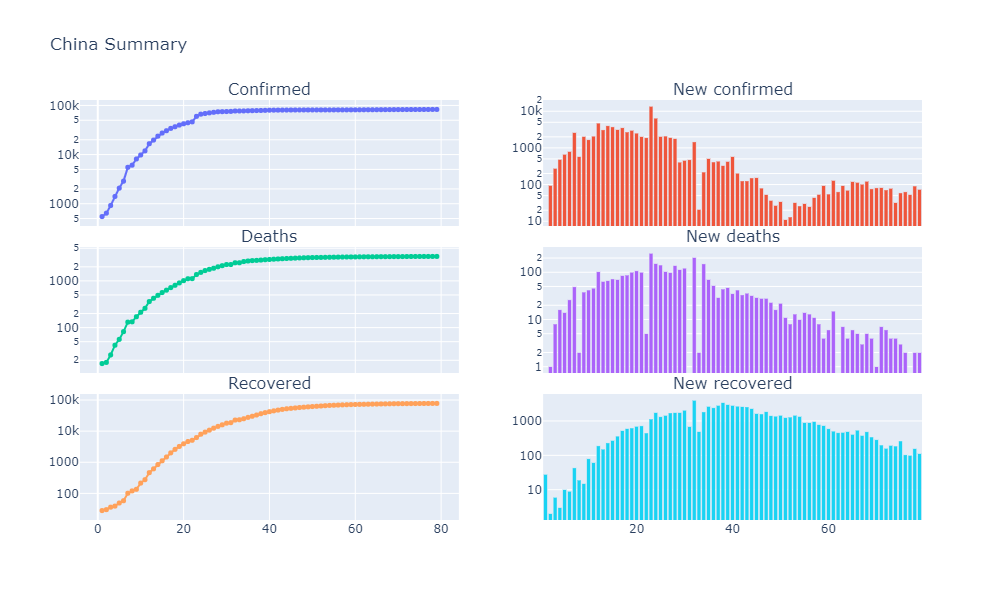

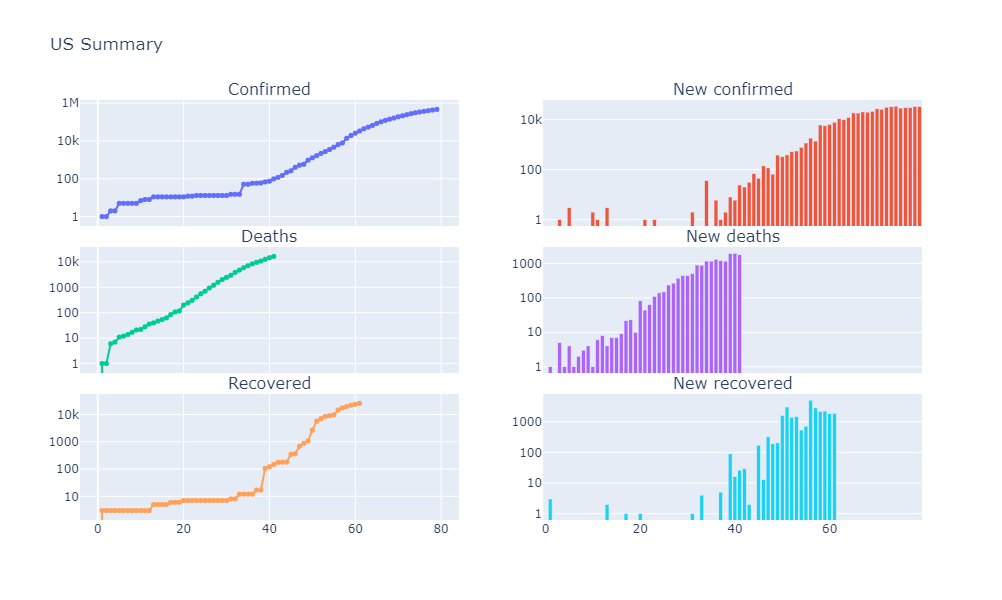

In [856]:
for country in highlightedCountries:
    focus=1
    figbr = make_subplots(
        rows=3, cols=2,
        shared_xaxes=True,
        vertical_spacing=0.05,
        specs=[[{"type": "scatter"},
               {"type": "scatter"}],
               [{"type": "scatter"},
               {"type": "scatter"}],
               [{"type": "scatter"},
               {"type": "scatter"}]],
        subplot_titles=("Confirmed", "New confirmed", 
                        "Deaths", "New deaths", 
                        "Recovered", "New recovered")
    )
    figbr.add_trace(
        go.Scatter(
            x=confirmedresultset[confirmedresultset.index == country].Days, 
            y=confirmedresultset[confirmedresultset.index == country].Confirmed, 
            name="Confirmed", 
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            ),
        row=1, col=1
    )
    figbr.add_trace(
        go.Bar(
            x=confirmedresultset[confirmedresultset.index==country].Days, 
            y=confirmedresultset[confirmedresultset.index==country].DailyChange, 
            name=" New confirmed",   
        ),
        row=1, col=2    
    )    
    figbr.add_trace(
        go.Scatter(
            x=deathsresultset[deathsresultset.index == country].Days, 
            y=deathsresultset[deathsresultset.index == country].Deaths, 
            name="Total deaths",
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
        ),
        row=2, col=1   

    )    
    figbr.add_trace(
        go.Bar(
            x=deathsresultset[deathsresultset.index == country].Days, 
            y=deathsresultset[deathsresultset.index == country].DailyChange, 
            name="New deaths", 
            ),
        row=2, col=2  
    )
    figbr.add_trace(
    go.Scatter(
            x=recoveredresultset[recoveredresultset.index == country].Days, 
            y=recoveredresultset[recoveredresultset.index == country].Recovered, 
            name="Total Recovered",
            mode="markers+lines", opacity=focus,
            marker={"symbol":"circle", "size": 5},
            ), 
        row=3,col=1
    )
    figbr.add_trace(
        go.Bar(
            x=recoveredresultset[recoveredresultset.index == country].Days, 
            y=recoveredresultset[recoveredresultset.index == country].DailyChange, 
            name="New recovered", 
            ), 
        row=3,col=2
    )
    figbr.update_layout(
        height=600,
        showlegend=False,
        title_text=country+ " Summary",
    )
    figbr.update_yaxes(type='log')
    figbr.show()

In [857]:
# fit logistic function to country 

x_values = confirmedresultset[confirmedresultset.index ==model_country]['Days'].values.tolist() 
y_values = confirmedresultset[confirmedresultset.index ==model_country]['Confirmed'].values.tolist()

# fitting functions
def f(t, K, P0, r):
    return  (K / (1 + ((K-P0)/P0)*np.exp(-r*t)))

# fitting
popt, pcov = curve_fit(f, x_values, y_values, p0=[1, 1, 0.5], maxfev=300000)
print(f"Fitting parameters")
print(f"K: {popt[0]}, P0: {popt[1]}, r: {popt[2]}")

Fitting parameters
K: 41927.062738015935, P0: 18.2723206071528, r: 0.16879708473099825


In [858]:
# prediction country
x_values = confirmedresultset[confirmedresultset.index ==country_to_predict]['Days'].values.tolist() 
y_values = confirmedresultset[confirmedresultset.index ==country_to_predict]['Confirmed'].values.tolist()

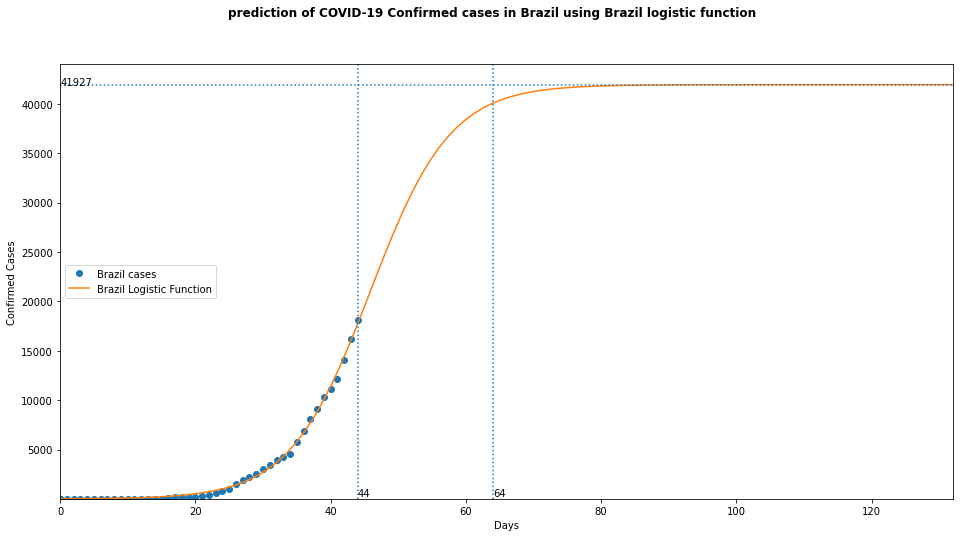

In [888]:
##### init main graph
fig = pl.figure(figsize=(16, 8))
ax = pl.axes()

# main graph captions
pl.suptitle("prediction of COVID-19 Confirmed cases in "+country_to_predict+ " using "+ model_country + " logistic function", fontweight="bold")
pl.ylabel('Confirmed Cases')
pl.xlabel('Days')

# main fitting plot
xx = np.linspace(0, x_values[-1]*3, 100, endpoint=True)
yy = f(xx, popt[0], popt[1], popt[2])
pl.xlim(xx[0], xx[-1])
pl.ylim(yy[0], yy[-1]*1.05)

# find day when reaching 95% of deaths
day95pc =0
for c, value in enumerate(yy):
    if value > yy[-1]*.95:
        day95pc = c
        break   
lastdatapointday = confirmedresultset[confirmedresultset.index ==country_to_predict]['Days'][-1]        

pl.plot(x_values, y_values,'o', label=country_to_predict+' cases')
pl.plot(xx, yy, label=model_country+" Logistic Function")
pl.legend(loc='center left')
pl.axhline(y=yy[-1], ls=':',)
pl.axvline(x=xx[day95pc], ls=':')
ax.annotate(str("%.0f" % round(yy[-1], 0)),xy=(0, yy[-1]))
pl.axvline(x=lastdatapointday, ls=':')
ax.annotate(str("%.0f" % lastdatapointday), xy=(lastdatapointday,250))
ax.annotate(str("%.0f" % xx[day95pc]), xy=(xx[day95pc],250))

# Any results you write to the current directory are saved as output.
pl.savefig("graph.png")

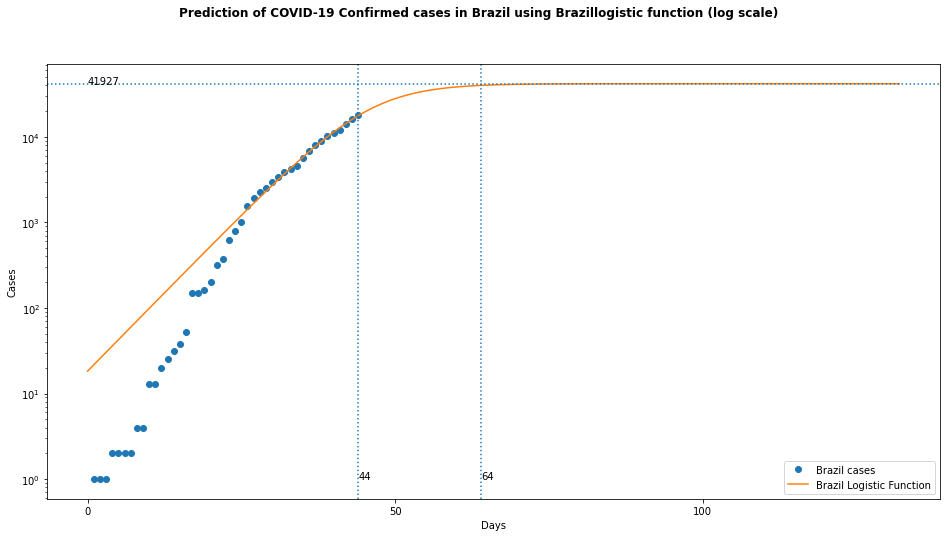

In [891]:
# init main graph
fig = pl.figure(figsize=(16, 8))
ax = pl.axes()

# main graph captions
pl.suptitle("Prediction of COVID-19 Confirmed cases in "+country_to_predict+" using "+model_country+"logistic function (log scale)", fontweight="bold")
pl.ylabel('Cases')
pl.xlabel('Days')

pl.yscale('Log')
pl.locator_params(axis='x',tight=True, nbins=5)
pl.plot(x_values, y_values,'o', label=country_to_predict+' cases')
pl.plot(xx, yy, label=model_country+" Logistic Function")
pl.legend(loc='lower right')
pl.axhline(y=yy[-1], ls=':',)
pl.axvline(x=xx[day95pc], ls=':')
ax.annotate(str("%.0f" % round(yy[-1], 0)),xy=(0, yy[-1]))
pl.axvline(x=lastdatapointday, ls=':')
ax.annotate(str("%.0f" % lastdatapointday), xy=(lastdatapointday,1))
ax.annotate(str("%.0f" % xx[day95pc]), xy=(xx[day95pc],1))
# Any results you write to the current directory are saved as output.
pl.savefig("graph_log.png")